In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data_comexstat.csv', encoding = "ISO-8859-1")

df.head()

,date,product,state,country,type,route,tons,usd
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0


In [3]:
df.dtypes

date        object
product     object
state       object
country     object
type        object
route       object
tons       float64
usd        float64
dtype: object

In [4]:
df.date = pd.to_datetime(df.date, format='%Y/%m/%d')

df.head()

,date,product,state,country,type,route,tons,usd
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0


In [5]:
df['year'] = df['date'].apply(lambda x: str(x)[:4])
df['month'] = df['date'].apply(lambda x: str(x)[5:7])

df.head()

,date,product,state,country,type,route,tons,usd,year,month
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0,1997,01
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0,1997,01
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1997,01
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1997,01
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0,1997,01


In [6]:
df.tail()

,date,product,state,country,type,route,tons,usd,year,month
117960,2019-12-01,wheat,SP,Argentina,Import,Sea,87124.765,17897516.0,2019,12
117961,2019-12-01,wheat,SP,Ireland,Export,Sea,0.500,477.0,2019,12
117962,2019-12-01,wheat,SP,Lebanon,Import,Sea,5.769,6726.0,2019,12
117963,2019-12-01,wheat,SP,Liberia,Export,Other,0.025,50.0,2019,12
117964,2019-12-01,wheat,SP,Marshall Islands,Export,Other,0.010,85.0,2019,12


#Q1

In [7]:
df_exports = df.loc[df['type'] == 'Export'].copy()

df_exports.head()

,date,product,state,country,type,route,tons,usd,year,month
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1997,01
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1997,01
5,1997-01-01,corn,MS,Paraguay,Export,Ground,40.000,38700.0,1997,01
9,1997-01-01,corn,PR,Netherlands,Export,Sea,170000.000,20000000.0,1997,01
10,1997-01-01,corn,PR,Paraguay,Export,Ground,258.300,386733.0,1997,01


In [8]:
df_exports['product'].value_counts()

sugar           32988
soybeans        21817
soybean_meal    17672
corn            17394
soybean_oil     15287
wheat             703
Name: product, dtype: int64

Como podemos observar, no geral, o açucar é o produto mais exportado pelo Brasil. Seguido de sója e o farelo de sója

##Soybeans

In [9]:
df1 = df_exports.loc[df_exports['product'] == 'soybeans'].copy()

df1.head()

,date,product,state,country,type,route,tons,usd,year,month
73,1997-01-01,soybeans,GO,Spain,Export,Sea,13730.0,3954240.0,1997,01
74,1997-01-01,soybeans,MT,Bolivia,Export,Other,100.0,60500.0,1997,01
75,1997-01-01,soybeans,RS,Argentina,Export,Ground,200.0,104000.0,1997,01
167,1997-02-01,soybeans,GO,Netherlands,Export,Sea,3000.0,855450.0,1997,02
168,1997-02-01,soybeans,MT,Netherlands,Export,Sea,5000.0,1436185.0,1997,02


###year

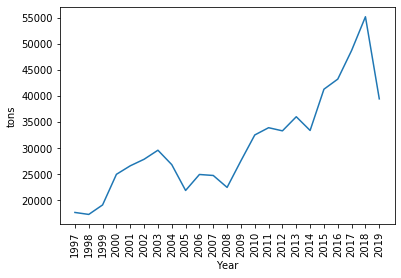

In [10]:
df_exports_year = df1.groupby(['year']).mean()

plt.plot(df_exports_year.tons)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('tons')

plt.show()

Em relação a quantidade, a sója vem em um período de alta desde 2008, com uma pequena queda em 2014 e uma queda bastante significativa em 2019.

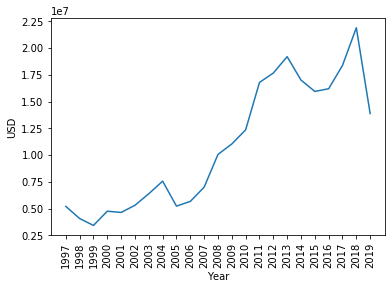

In [11]:
plt.plot(df_exports_year.usd)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('USD')

plt.show()

Assim como a quantidade, o valor arrecadado atraves da exportação da sója sofre a mesma queda em 2004 e em 2019. Possivelmente por uma queda no preço da sója, entre 2013 e 2015 teve uma pequena queda.

###month

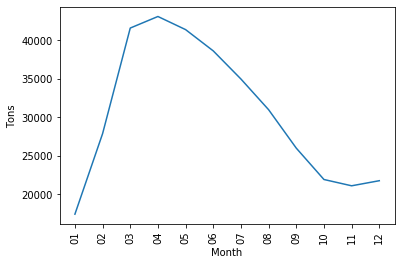

In [12]:
df_exports_month = df1.groupby(['month']).mean()

plt.plot(df_exports_month.tons)
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Tons')

plt.show()

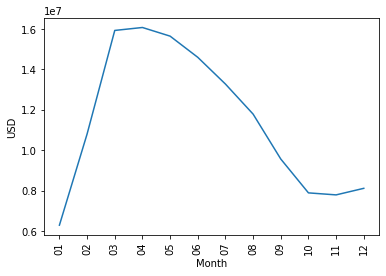

In [13]:
plt.plot(df_exports_month.usd)
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('USD')

plt.show()

Os melhores meses de exportação, estão compreendidos entre março e maio mantendo quase uma constância. Já os piores meses estão entre outubro e novembro.

##soybean oil

In [14]:
df2 = df_exports.loc[df_exports['product'] == 'soybean_oil'].copy()

df2.head()

,date,product,state,country,type,route,tons,usd,year,month
57,1997-01-01,soybean_oil,MS,Bolivia,Export,Other,48.053,43268.0,1997,01
58,1997-01-01,soybean_oil,MT,China,Export,Sea,6000.000,3002191.0,1997,01
61,1997-01-01,soybean_oil,PR,Bangladesh,Export,Sea,5430.000,2920399.0,1997,01
62,1997-01-01,soybean_oil,PR,China,Export,Sea,8095.000,4129840.0,1997,01
63,1997-01-01,soybean_oil,PR,Germany,Export,Sea,500.000,287150.0,1997,01


###Year

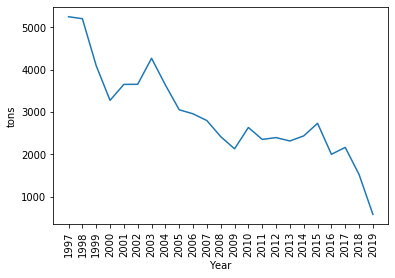

In [15]:
df_exports_year = df2.groupby(['year']).mean()

plt.plot(df_exports_year.tons)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('tons')

plt.show()

A exportação do óleo de sója, veio em crescimento desde o ano de 2008 até o ano de 2018 com uma sutíl queda em 2014, e como vimos anteriormente com o grão de sója, uma grande queda em 2019

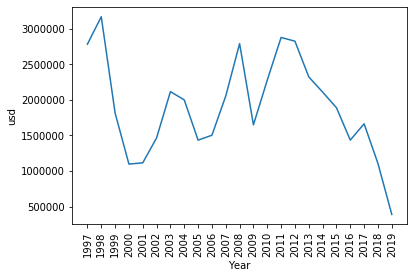

In [16]:
plt.plot(df_exports_year.usd)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('usd')

plt.show()

O valor do óleo de sója oscilou bastante conforme os anos se passaram. Mesmo em ascensão, o valor adquirido teve bastante oscilação.

###Month

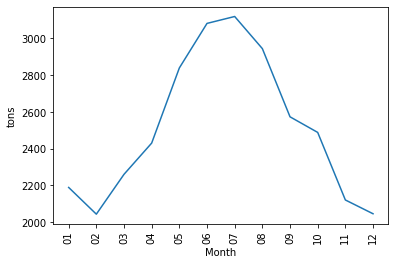

In [17]:
df_exports_month = df2.groupby(['month']).mean()

plt.plot(df_exports_month.tons)
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('tons')

plt.show()

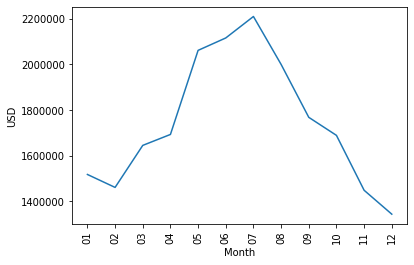

In [18]:
plt.plot(df_exports_month.usd)
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('USD')

plt.show()

Assim como o grão de sója, os melhores meses de exportação foram entre março e maio e ao contrário do grão, o óleo de soja no período de baixa do grão, teve seu valor elevado.

##soybean meal

In [19]:
df3 = df_exports.loc[df_exports['product'] == 'soybean_meal'].copy()

df3.head()

,date,product,state,country,type,route,tons,usd,year,month
19,1997-01-01,soybean_meal,GO,Netherlands,Export,Sea,419.070,119318.0,1997,01
20,1997-01-01,soybean_meal,GO,Netherlands,Export,Sea,5000.000,1414250.0,1997,01
21,1997-01-01,soybean_meal,MS,Germany,Export,Sea,140.672,38378.0,1997,01
22,1997-01-01,soybean_meal,MS,Hungary,Export,Sea,15000.000,4042100.0,1997,01
23,1997-01-01,soybean_meal,MS,Netherlands,Export,Sea,14000.000,3850162.0,1997,01


###Year

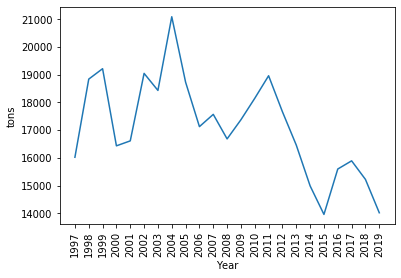

In [20]:
df_exports_year = df3.groupby(['year']).mean()

plt.plot(df_exports_year.tons)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('tons')

plt.show()

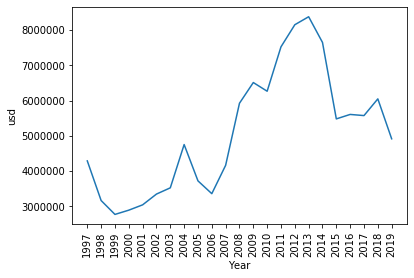

In [21]:
plt.plot(df_exports_year.usd)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('usd')

plt.show()

O farelo de sója vem em queda desde 2011, assim como o seu valor.

###Month

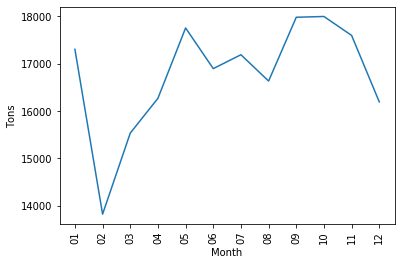

In [22]:
df_exports_month = df3.groupby(['month']).mean()

plt.plot(df_exports_month.tons)
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Tons')

plt.show()

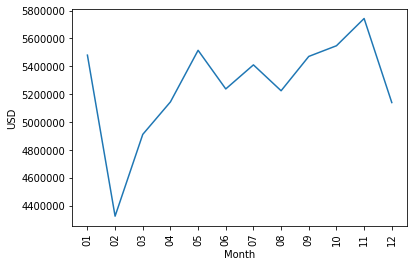

In [23]:
plt.plot(df_exports_month.usd)
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('USD')

plt.show()

Diferente dos outros dois produtos, o farelo de sója tem os melhores meses de exportação entre setembro e novembro, com uma grande baixa no mês de fevereiro.

#Q2

In [24]:
df_exports.head()

,date,product,state,country,type,route,tons,usd,year,month
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1997,01
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1997,01
5,1997-01-01,corn,MS,Paraguay,Export,Ground,40.000,38700.0,1997,01
9,1997-01-01,corn,PR,Netherlands,Export,Sea,170000.000,20000000.0,1997,01
10,1997-01-01,corn,PR,Paraguay,Export,Ground,258.300,386733.0,1997,01


In [25]:
df_last_5 = df_exports.loc[df_exports.year >= '2015']

df_last_5.head()

,date,product,state,country,type,route,tons,usd,year,month
75505,2015-01-01,corn,BA,Morocco,Export,Sea,7486.339,1370000.0,2015,01
75506,2015-01-01,corn,DF,Taiwan,Export,Sea,6.085,1168.0,2015,01
75507,2015-01-01,corn,ES,South Korea,Export,Sea,50.000,8135.0,2015,01
75508,2015-01-01,corn,GO,China,Export,Sea,41331.166,8143579.0,2015,01
75509,2015-01-01,corn,GO,Costa Rica,Export,Sea,40.000,13140.0,2015,01


In [26]:
df_last_5['product'].value_counts()

sugar           13614
corn             7677
soybeans         7175
soybean_meal     5154
soybean_oil      4549
wheat             368
Name: product, dtype: int64

In [27]:
df_last_5.groupby(['product']).sum()

,tons,usd
product,,
corn,1.445993e+08,2.444772e+10
soybean_meal,7.664749e+07,2.840772e+10
soybean_oil,6.711428e+06,4.795947e+09
soybeans,3.263315e+08,1.233255e+11
sugar,1.200336e+08,4.093849e+10
wheat,3.885836e+06,7.269454e+08


Nos últimos 5 anos, os principais produtos mais exportados pelo Brasil são: Açucar, milho e grão de sója.

#Q3

In [28]:
df_exports.head()

,date,product,state,country,type,route,tons,usd,year,month
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1997,01
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1997,01
5,1997-01-01,corn,MS,Paraguay,Export,Ground,40.000,38700.0,1997,01
9,1997-01-01,corn,PR,Netherlands,Export,Sea,170000.000,20000000.0,1997,01
10,1997-01-01,corn,PR,Paraguay,Export,Ground,258.300,386733.0,1997,01


In [29]:
df_corn = df_exports.loc[df_exports['product'] == 'corn'].copy()

df_corn.head()

,date,product,state,country,type,route,tons,usd,year,month
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1997,01
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1997,01
5,1997-01-01,corn,MS,Paraguay,Export,Ground,40.000,38700.0,1997,01
9,1997-01-01,corn,PR,Netherlands,Export,Sea,170000.000,20000000.0,1997,01
10,1997-01-01,corn,PR,Paraguay,Export,Ground,258.300,386733.0,1997,01


In [30]:
df_corn.route.value_counts()

Sea       13448
Ground     1830
Air         917
Other       731
River       468
Name: route, dtype: int64

In [31]:
df.route.value_counts()

Sea       93870
Ground    13038
Other      6374
Air        2918
River      1765
Name: route, dtype: int64

A principal rota de exportação de milho é por vias marítimas. A via por onde os produtos são exportados varia de acordo com o seu destino, por exemplo, um carregamento de soja para a China será melhor e com um custo menor de ser exportado por um navio do que se comparado com um avião. Via Terrestre é vantajoso também para destinos próximos e em quantidades menores.

#Q4

In [32]:
df_last_3 = df_exports.loc[df_exports.year >= '2017']

df_last_3.head()

,date,product,state,country,type,route,tons,usd,year,month
90622,2017-01-01,corn,GO,Dominican Republic,Export,Sea,795.679,147710.0,2017,01
90623,2017-01-01,corn,GO,Ecuador,Export,Air,0.122,1504.0,2017,01
90624,2017-01-01,corn,GO,Egypt,Export,Sea,199.950,533884.0,2017,01
90625,2017-01-01,corn,GO,Iran,Export,Sea,17.680,2791.0,2017,01
90626,2017-01-01,corn,GO,Iran,Export,Sea,600.000,85626.0,2017,01


###Corn

In [33]:
df_corn_3 = df_last_3.loc[df_last_3['product'] == 'corn'].copy()

df_corn_3.head()

,date,product,state,country,type,route,tons,usd,year,month
90622,2017-01-01,corn,GO,Dominican Republic,Export,Sea,795.679,147710.0,2017,01
90623,2017-01-01,corn,GO,Ecuador,Export,Air,0.122,1504.0,2017,01
90624,2017-01-01,corn,GO,Egypt,Export,Sea,199.950,533884.0,2017,01
90625,2017-01-01,corn,GO,Iran,Export,Sea,17.680,2791.0,2017,01
90626,2017-01-01,corn,GO,Iran,Export,Sea,600.000,85626.0,2017,01


In [34]:
df_corn_3.country.value_counts()

Iran                     355
Egypt                    282
Spain                    266
Japan                    253
Vietnam                  208
                        ... 
Australia                  1
Bulgaria                   1
Mozambique                 1
Luxembourg                 1
São Tome and Principe      1
Name: country, Length: 113, dtype: int64

Os principais parceiros brasileiros de exportação de milho são Irã, Egito e Espanha.

###Sugar

In [35]:
df_sugar_3 = df_last_3.loc[df_last_3['product'] == 'sugar'].copy()

df_sugar_3.head()

,date,product,state,country,type,route,tons,usd,year,month
90867,2017-01-01,sugar,AL,Canada,Export,Sea,62000.0,22821294.0,2017,01
90868,2017-01-01,sugar,AL,Ghana,Export,Sea,4050.0,2076639.0,2017,01
90869,2017-01-01,sugar,AL,Guinea,Export,Sea,270.0,147555.0,2017,01
90870,2017-01-01,sugar,AL,Liberia,Export,Sea,270.0,147555.0,2017,01
90871,2017-01-01,sugar,AL,Togo,Export,Sea,324.0,177066.0,2017,01


In [36]:
df_sugar_3.country.value_counts()

Uruguay                        302
Liberia                        288
Venezuela                      282
Panama                         273
Marshall Islands               263
                              ... 
Ethiopia                         1
Belize                           1
Gabon                            1
Falkland Islands (Malvinas)      1
Bosnia and Herzegovina           1
Name: country, Length: 154, dtype: int64

Já em relação ao açucar são Uruguai, Libéria e Venezuela.

#Q5

In [37]:
df_exports.head()

,date,product,state,country,type,route,tons,usd,year,month
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1997,01
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1997,01
5,1997-01-01,corn,MS,Paraguay,Export,Ground,40.000,38700.0,1997,01
9,1997-01-01,corn,PR,Netherlands,Export,Sea,170000.000,20000000.0,1997,01
10,1997-01-01,corn,PR,Paraguay,Export,Ground,258.300,386733.0,1997,01


In [38]:
df_exports['product'].value_counts()

sugar           32988
soybeans        21817
soybean_meal    17672
corn            17394
soybean_oil     15287
wheat             703
Name: product, dtype: int64

###Corn

In [39]:
df_exp_corn = df_exports.loc[df_exports['product'] == 'corn'].copy()

df_exp_corn.head()

,date,product,state,country,type,route,tons,usd,year,month
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1997,01
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1997,01
5,1997-01-01,corn,MS,Paraguay,Export,Ground,40.000,38700.0,1997,01
9,1997-01-01,corn,PR,Netherlands,Export,Sea,170000.000,20000000.0,1997,01
10,1997-01-01,corn,PR,Paraguay,Export,Ground,258.300,386733.0,1997,01


In [40]:
df_exp_corn.state.value_counts()

MT    4387
PR    2714
GO    2643
SP    2118
MS    1590
MG    1277
RS     782
RO     446
SC     437
MA     209
PA     205
TO     183
DF      94
BA      63
ES      58
PI      51
RJ      47
RR      32
AC      29
CE       9
AM       8
PE       8
RN       1
PB       1
AL       1
AP       1
Name: state, dtype: int64

###Sugar

In [41]:
df_exp_sugar = df_exports.loc[df_exports['product'] == 'sugar'].copy()

df_exp_sugar.head()

,date,product,state,country,type,route,tons,usd,year,month
76,1997-01-01,sugar,PE,Algeria,Export,Air,1000.0,307000.0,1997,01
77,1997-01-01,sugar,PE,Algeria,Export,Sea,12400.0,3587650.0,1997,01
78,1997-01-01,sugar,PE,Gambia,Export,Sea,3560.0,1032400.0,1997,01
79,1997-01-01,sugar,PE,Ghana,Export,Sea,9040.0,2798359.0,1997,01
80,1997-01-01,sugar,PE,Iran,Export,Sea,28000.0,8190000.0,1997,01


In [42]:
df_exp_sugar.state.value_counts()

SP    18278
GO     2732
MG     2646
PR     1993
MS     1524
PE     1118
AL      999
MT      711
SC      479
RS      425
ES      418
RJ      336
PB      286
SE      173
AM      149
BA      139
RN      137
MA      114
PA       99
RR       92
CE       79
RO       35
AC       13
AP        8
DF        4
PI        1
Name: state, dtype: int64

###soybeans 

In [43]:
df_exp_soyb = df_exports.loc[df_exports['product'] == 'soybeans'].copy()

df_exp_soyb.head()

,date,product,state,country,type,route,tons,usd,year,month
73,1997-01-01,soybeans,GO,Spain,Export,Sea,13730.0,3954240.0,1997,01
74,1997-01-01,soybeans,MT,Bolivia,Export,Other,100.0,60500.0,1997,01
75,1997-01-01,soybeans,RS,Argentina,Export,Ground,200.0,104000.0,1997,01
167,1997-02-01,soybeans,GO,Netherlands,Export,Sea,3000.0,855450.0,1997,02
168,1997-02-01,soybeans,MT,Netherlands,Export,Sea,5000.0,1436185.0,1997,02


In [44]:
df_exp_soyb.state.value_counts()

MT    4980
PR    3188
GO    2166
MS    1603
MG    1472
SP    1460
RS    1443
SC     888
BA     790
TO     778
MA     703
PA     692
RO     610
PI     434
DF     412
RR     111
ES      22
AM      21
AP      14
RJ      11
AC       6
PE       5
AL       5
PB       2
SE       1
Name: state, dtype: int64

###soybean meal

In [45]:
df_exp_soym = df_exports.loc[df_exports['product'] == 'soybean_meal'].copy()

df_exp_soym.head()

,date,product,state,country,type,route,tons,usd,year,month
19,1997-01-01,soybean_meal,GO,Netherlands,Export,Sea,419.070,119318.0,1997,01
20,1997-01-01,soybean_meal,GO,Netherlands,Export,Sea,5000.000,1414250.0,1997,01
21,1997-01-01,soybean_meal,MS,Germany,Export,Sea,140.672,38378.0,1997,01
22,1997-01-01,soybean_meal,MS,Hungary,Export,Sea,15000.000,4042100.0,1997,01
23,1997-01-01,soybean_meal,MS,Netherlands,Export,Sea,14000.000,3850162.0,1997,01


In [46]:
df_exp_soym.state.value_counts()

MT    3953
PR    3251
RS    2657
GO    1976
MG    1602
SP    1585
MS    1553
BA     548
SC     347
TO      60
PA      35
PI      31
MA      25
RO      16
RJ      13
PE       7
AM       4
ES       3
AL       2
RN       1
AC       1
CE       1
RR       1
Name: state, dtype: int64

###soybean oil     

In [47]:
df_exp_soyo = df_exports.loc[df_exports['product'] == 'soybean_oil'].copy()

df_exp_soyo.head()

,date,product,state,country,type,route,tons,usd,year,month
57,1997-01-01,soybean_oil,MS,Bolivia,Export,Other,48.053,43268.0,1997,01
58,1997-01-01,soybean_oil,MT,China,Export,Sea,6000.000,3002191.0,1997,01
61,1997-01-01,soybean_oil,PR,Bangladesh,Export,Sea,5430.000,2920399.0,1997,01
62,1997-01-01,soybean_oil,PR,China,Export,Sea,8095.000,4129840.0,1997,01
63,1997-01-01,soybean_oil,PR,Germany,Export,Sea,500.000,287150.0,1997,01


In [48]:
df_exp_soyo.state.value_counts()

PR    3476
MT    2697
SP    2131
SC    2023
RS    1420
GO    1166
MS     724
MG     616
ES     265
BA     190
RJ     151
MA      98
RR      92
AL      66
PE      36
AM      33
RO      33
PA      32
AC      21
PI       6
CE       5
TO       3
DF       2
AP       1
Name: state, dtype: int64

###wheat             

In [49]:
df_exp_wheat = df_exports.loc[df_exports['product'] == 'wheat'].copy()

df_exp_wheat.head()

,date,product,state,country,type,route,tons,usd,year,month
17466,2003-12-01,wheat,MG,United States,Export,Sea,1.50,657.0,2003,12
17711,2004-01-01,wheat,MG,United States,Export,Sea,3.00,1269.0,2004,01
21208,2005-01-01,wheat,MG,United States,Export,Sea,0.40,164.0,2005,01
21780,2005-03-01,wheat,MG,United States,Export,Sea,0.40,170.0,2005,03
22459,2005-05-01,wheat,PR,United States,Export,Sea,0.39,231.0,2005,05


In [50]:
df_exp_wheat.state.value_counts()

PR    308
RS    194
SP     80
RO     27
RJ     25
SC     24
MG     19
GO     10
ES      6
MS      5
DF      4
MA      1
Name: state, dtype: int64

*   Milho - Mato Grosso
*   Açucar - São Paulo
*   Sója - Mato Grosso
*   Farelo de sója - Mato Grosso
*   Óleo de soja - Paraná
*   Trigo - Paraná

#Q6

In [51]:
df_exports.head()

,date,product,state,country,type,route,tons,usd,year,month
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1997,01
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1997,01
5,1997-01-01,corn,MS,Paraguay,Export,Ground,40.000,38700.0,1997,01
9,1997-01-01,corn,PR,Netherlands,Export,Sea,170000.000,20000000.0,1997,01
10,1997-01-01,corn,PR,Paraguay,Export,Ground,258.300,386733.0,1997,01


In [52]:
df_p = df_exports.drop(columns=['date', 'month', 'usd', 'state', 'country', 'type', 'route'], axis=1)

df_p.head()

,product,tons,year
2,corn,0.200,1997
3,corn,3.488,1997
5,corn,40.000,1997
9,corn,170000.000,1997
10,corn,258.300,1997


In [53]:
df_p = pd.get_dummies(df_p, columns=['product']).copy()
df_p = df_p.apply(pd.to_numeric)
df_p.head()

,tons,year,product_corn,product_soybean_meal,product_soybean_oil,product_soybeans,product_sugar,product_wheat
2,0.200,1997,1,0,0,0,0,0
3,3.488,1997,1,0,0,0,0,0
5,40.000,1997,1,0,0,0,0,0
9,170000.000,1997,1,0,0,0,0,0
10,258.300,1997,1,0,0,0,0,0


In [54]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

X = df_p.drop('tons', axis=1)
y = df_p['tons']

X_train, X_test, y_train, y_test = train_test_split(X, y)

lreg.fit(X_train, y_train)

NameError: name 'train_test_split' is not defined

In [ ]:
pred = lreg.predict(X_test)
print(pred)

In [ ]:
import numpy as np
mse = np.mean((pred - y_test)**2)
mse

In [ ]:
lreg.score(X_test,y_test)

In [ ]:
pred_20 = np.array([2020, 0, 0, 0, 1, 0, 0]).reshape((1, -1))

print(lreg.predict(pred_20)[0])

###Soybeans

In [ ]:
for n in range(2020, 2031):
  pred_tons = np.array([n, 0, 0, 0, 1, 0, 0]).reshape((1, -1))
  print("pred:", n, "\t{}".format(lreg.predict(pred_tons)[0]), "tons")

###soybean meal

In [ ]:
for n in range(2020, 2031):
  pred_tons = np.array([n, 0, 1, 0, 0, 0, 0]).reshape((1, -1))
  print("pred:", n, "\t{}".format(lreg.predict(pred_tons)[0]), "tons")

###corn

In [ ]:
for n in range(2020, 2031):
  pred_tons = np.array([n, 1, 0, 0, 0, 0, 0]).reshape((1, -1))
  print("pred:", n, "\t{}".format(lreg.predict(pred_tons)[0]), "tons")